In [7]:
import pandas as pd
import numpy as np

# Load the dataset

df = pd.read_excel("C:/Users/keert/Documents/Python_assignments/myexcel.xlsx")


# Display the first few rows
print(df.head())


            Name            Team  Number Position  Age               Height  \
0  Avery Bradley  Boston Celtics       0       PG   25  2023-02-06 00:00:00   
1    Jae Crowder  Boston Celtics      99       SF   25  2023-06-06 00:00:00   
2   John Holland  Boston Celtics      30       SG   27  2023-05-06 00:00:00   
3    R.J. Hunter  Boston Celtics      28       SG   22  2023-05-06 00:00:00   
4  Jonas Jerebko  Boston Celtics       8       PF   29  2023-10-06 00:00:00   

   Weight            College     Salary  
0     180              Texas  7730337.0  
1     235          Marquette  6796117.0  
2     205  Boston University        NaN  
3     185      Georgia State  1148640.0  
4     231                NaN  5000000.0  


In [11]:
# Set a random seed for reproducibility
np.random.seed(460)

# Replace the "Height" column with random values between 150 and 180
df["Height"] = np.random.randint(150, 181, df.shape[0])

# Display updated data
print(df.head())


            Name            Team  Number Position  Age  Height  Weight  \
0  Avery Bradley  Boston Celtics       0       PG   25     160     180   
1    Jae Crowder  Boston Celtics      99       SF   25     169     235   
2   John Holland  Boston Celtics      30       SG   27     160     205   
3    R.J. Hunter  Boston Celtics      28       SG   22     159     185   
4  Jonas Jerebko  Boston Celtics       8       PF   29     152     231   

             College     Salary  
0              Texas  7730337.0  
1          Marquette  6796117.0  
2  Boston University        NaN  
3      Georgia State  1148640.0  
4                NaN  5000000.0  


In [13]:
df.to_excel("cleaned_data.xlsx", index=False)  # Save to a new file


Employee Distribution by Team:
 Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

Percentage Split of Employees by Team:
 Team
New Orleans Pelicans 

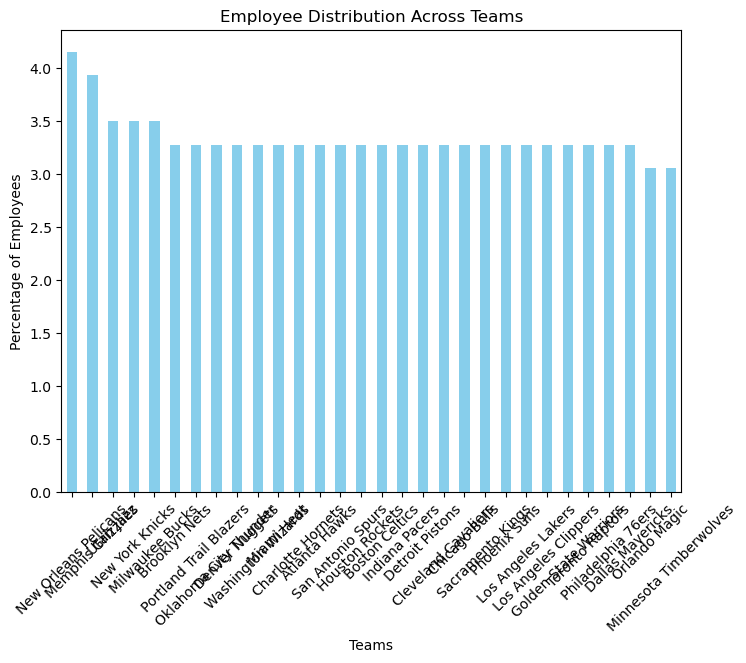

In [18]:
# 1. Determine the distribution of employees across each team and calculate the percentage split

import matplotlib.pyplot as plt

# Count the number of employees in each team
team_distribution = df["Team"].value_counts()

# Calculate the percentage of each team
team_percentage = (team_distribution / len(df)) * 100

# Display results
print("Employee Distribution by Team:\n", team_distribution)
print("\nPercentage Split of Employees by Team:\n", team_percentage)

# Visualization
plt.figure(figsize=(8, 6))
team_percentage.plot(kind="bar", color="skyblue")
plt.xlabel("Teams")
plt.ylabel("Percentage of Employees")
plt.title("Employee Distribution Across Teams")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# 2. Segregate employees based on their positions within the company

Employee Distribution by Position:
 Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


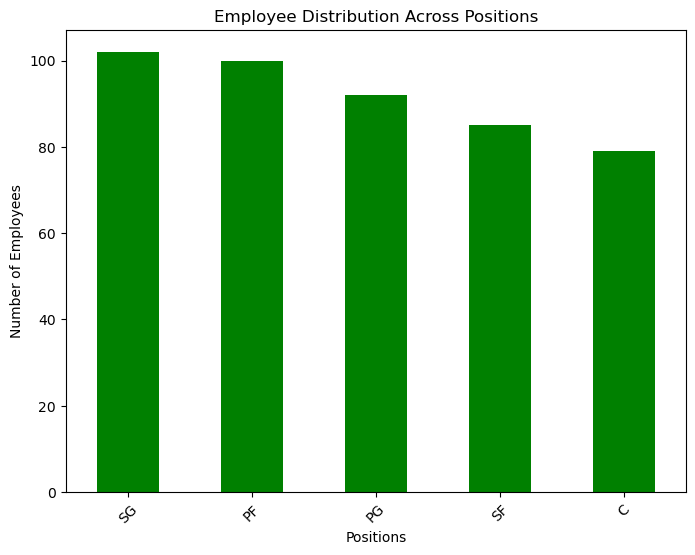

In [20]:
# Count the number of employees in each position
position_distribution = df["Position"].value_counts()

# Display results
print("Employee Distribution by Position:\n", position_distribution)

# Visualization
plt.figure(figsize=(8, 6))
position_distribution.plot(kind="bar", color="green")
plt.xlabel("Positions")
plt.ylabel("Number of Employees")
plt.title("Employee Distribution Across Positions")
plt.xticks(rotation=45)
plt.show()


Predominant Age Group:
 Age Group
18-24    154
25-34    272
35-44     32
45-54      0
55-64      0
Name: count, dtype: int64


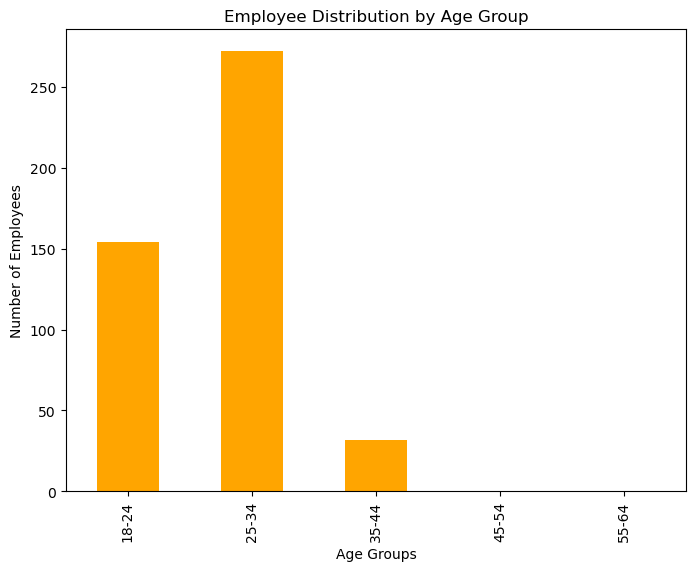

In [22]:
# 3. Identify the predominant age group among employees

# Define age groups
bins = [18, 25, 35, 45, 55, 65]
labels = ["18-24", "25-34", "35-44", "45-54", "55-64"]

# Create an "Age Group" column
df["Age Group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

# Count employees in each age group
age_group_distribution = df["Age Group"].value_counts().sort_index()

# Display results
print("Predominant Age Group:\n", age_group_distribution)

# Visualization
plt.figure(figsize=(8, 6))
age_group_distribution.plot(kind="bar", color="orange")
plt.xlabel("Age Groups")
plt.ylabel("Number of Employees")
plt.title("Employee Distribution by Age Group")
plt.show()


Salary Expenditure by Team:
 Team
Cleveland Cavaliers       106988689.0
Los Angeles Clippers       94854640.0
Oklahoma City Thunder      93765298.0
Golden State Warriors      88868997.0
Chicago Bulls              86783378.0
San Antonio Spurs          84442733.0
New Orleans Pelicans       82750774.0
Miami Heat                 82515673.0
Charlotte Hornets          78340920.0
Memphis Grizzlies          76550880.0
Washington Wizards         76328636.0
Houston Rockets            75283021.0
New York Knicks            73303898.0
Atlanta Hawks              72902950.0
Los Angeles Lakers         71770431.0
Sacramento Kings           71683666.0
Dallas Mavericks           71198732.0
Toronto Raptors            71117611.0
Milwaukee Bucks            69603517.0
Detroit Pistons            67168263.0
Indiana Pacers             66751826.0
Utah Jazz                  64007367.0
Phoenix Suns               63445135.0
Orlando Magic              60161470.0
Denver Nuggets             60121930.0
Minnesota Timber

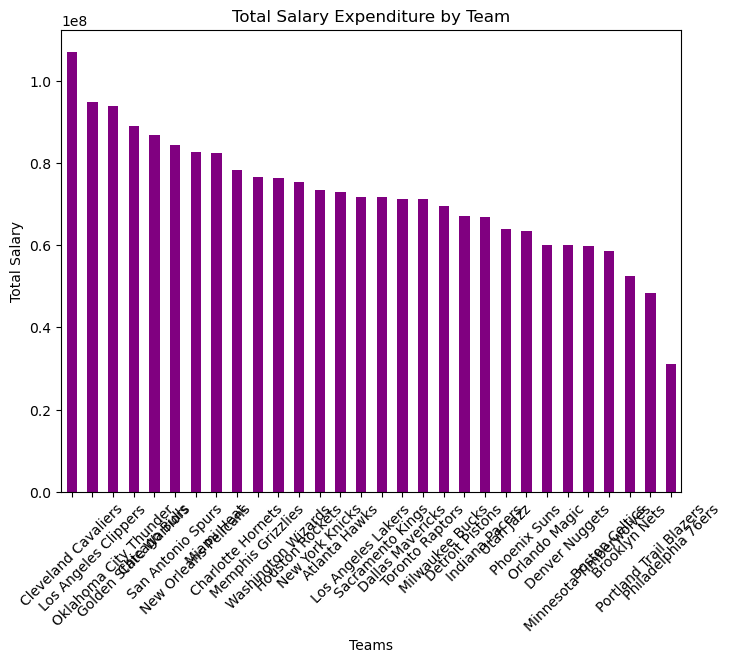

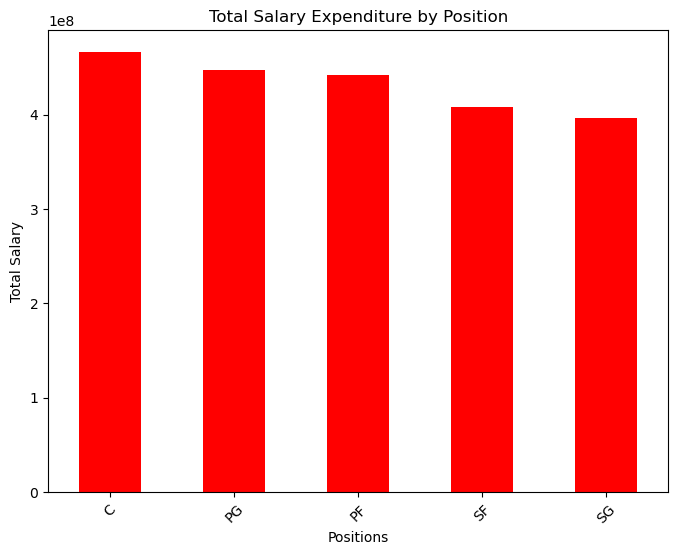

In [24]:
#4. Discover which team and position have the highest salary expenditure

# Group by team and sum salaries
team_salary = df.groupby("Team")["Salary"].sum().sort_values(ascending=False)

# Group by position and sum salaries
position_salary = df.groupby("Position")["Salary"].sum().sort_values(ascending=False)

# Display results
print("Salary Expenditure by Team:\n", team_salary)
print("\nSalary Expenditure by Position:\n", position_salary)

# Visualization
plt.figure(figsize=(8, 6))
team_salary.plot(kind="bar", color="purple")
plt.xlabel("Teams")
plt.ylabel("Total Salary")
plt.title("Total Salary Expenditure by Team")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 6))
position_salary.plot(kind="bar", color="red")
plt.xlabel("Positions")
plt.ylabel("Total Salary")
plt.title("Total Salary Expenditure by Position")
plt.xticks(rotation=45)
plt.show()


Correlation between Age and Salary: 0.21400941226570974


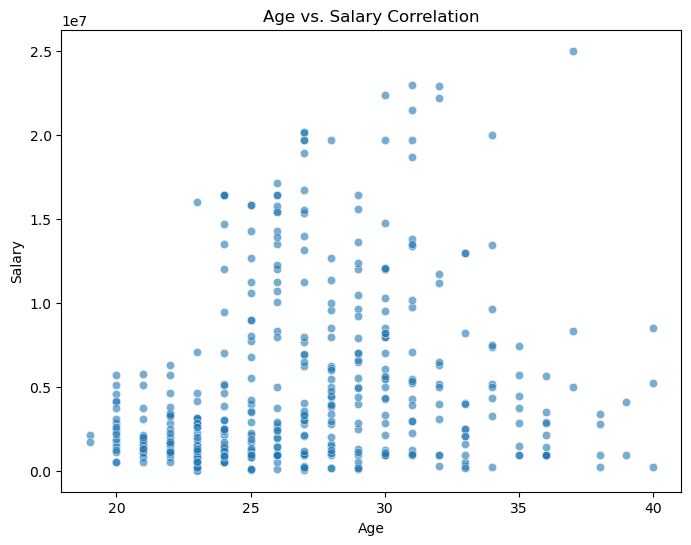

In [26]:
#5. Investigate if there's any correlation between age and salary
import seaborn as sns

# Calculate correlation
correlation = df["Age"].corr(df["Salary"])
print("Correlation between Age and Salary:", correlation)

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Age"], y=df["Salary"], alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age vs. Salary Correlation")
plt.show()
